step = 0, loss = 3013.37646484375, weight = [-0.00190513], bias = [-0.2724087]
step = 1, loss = 3012.568115234375, weight = [-0.00180513], bias = [-0.2723086]
step = 2, loss = 3011.760009765625, weight = [-0.00170513], bias = [-0.27220848]
step = 3, loss = 3010.9521484375, weight = [-0.00160514], bias = [-0.27210838]
step = 4, loss = 3010.143798828125, weight = [-0.00150514], bias = [-0.27200827]
step = 5, loss = 3009.3359375, weight = [-0.00140514], bias = [-0.27190816]
step = 6, loss = 3008.52880859375, weight = [-0.00130515], bias = [-0.27180806]
step = 7, loss = 3007.720947265625, weight = [-0.00120516], bias = [-0.27170795]
step = 8, loss = 3006.913330078125, weight = [-0.00110517], bias = [-0.27160785]
step = 9, loss = 3006.105712890625, weight = [-0.00100518], bias = [-0.27150774]
step = 1000, loss = 2281.194580078125, weight = [0.09507231], bias = [-0.17539097]
step = 2000, loss = 1684.2457275390625, weight = [0.18674046], bias = [-0.08382063]
step = 3000, loss = 1201.223510742

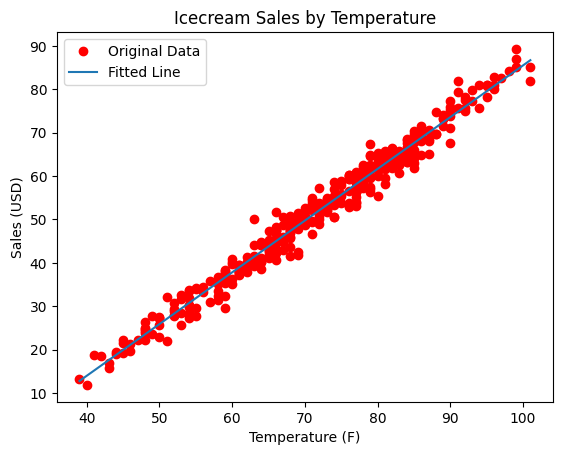

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Dataset X: Temperature in Fahrenheit, Y: Sales in USD
X = [39, 40, 41, 42, 43, 43, 44, 44, 45, 45, 45, 46, 46, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 50, 50, 50, 51, 51, 52, 52, 52, 52, 52, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 56, 56, 57, 57, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62, 62, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 73, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 80, 80, 80, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 81, 81, 81, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 83, 83, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 86, 86, 86, 86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87, 88, 88, 88, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 92, 92, 92, 92, 93, 93, 94, 94, 95, 95, 95, 95, 96, 96, 96, 97, 98, 99, 99, 99, 101, 101]
Y = [13.17, 11.88, 18.82, 18.65, 17.02, 15.88, 19.07, 19.57, 21.62, 22.34, 19.23, 21.25, 19.81, 22.12, 24.22, 24.68, 23.78, 26.41, 25.01, 22.29, 27.81, 23.54, 22.89, 25.68, 27.29, 27.64, 27.31, 21.93, 32.18, 30.67, 28.05, 28.82, 27.87, 29.39, 32.6, 31.62, 25.71, 28.48, 30.09, 33.58, 29.75, 31.94, 33.71, 28.37, 27.41, 27.99, 30.37, 27.68, 29.53, 33.91, 34.19, 33.22, 34.47, 30.89, 35.8, 33.44, 36.79, 31.56, 35.13, 36.11, 32.39, 38.18, 29.69, 38.47, 37.74, 36.71, 32.29, 37.5, 35.33, 35.06, 36.25, 40.25, 39.69, 40.95, 37.96, 38.1, 38.21, 37.3, 39.53, 37.42, 39.42, 38.16, 37.66, 39.04, 41.44, 40.19, 37.93, 50.17, 44.15, 41.58, 40.59, 39.17, 40.57, 40.28, 41.21, 44.85, 40.94, 40.14, 38.57, 44.07, 44.1, 47.36, 45.38, 41.09, 43.78, 42.72, 42.1, 43.28, 44.31, 42.71, 43.03, 42.16, 46.74, 47.68, 44.48, 47.52, 44.98, 45.07, 45.42, 47.36, 48.26, 51.75, 45.05, 40.65, 48.65, 45.26, 46.04, 44.85, 42.94, 50.62, 45.65, 49.37, 45.89, 50.74, 47.17, 49.6, 41.68, 46.9, 47.35, 47.73, 43.73, 47.47, 51.38, 41.74, 49.88, 47.78, 42.5, 48.77, 49.46, 50.87, 49.12, 49.95, 50.31, 49.32, 52.67, 52.05, 48.82, 53.33, 54.59, 53.77, 49.6, 52.17, 46.74, 53.04, 49.34, 55.04, 57.18, 51.26, 53.78, 51.55, 50.01, 53.59, 52.47, 48.96, 53.57, 50.79, 52.13, 52.42, 54.67, 51.82, 53.21, 54.4, 55.01, 54.08, 53.97, 55.28, 54.36, 53.62, 50.65, 55.52, 58.61, 50.64, 54.28, 53.95, 53.44, 57.1, 54.26, 55.34, 53.71, 57.84, 55.91, 58.62, 58.85, 52.84, 56.59, 59.43, 59.69, 53.83, 59.41, 53.17, 53.48, 59.94, 60.31, 60.33, 53.82, 53.07, 59.48, 54.1, 56.33, 59.87, 60.75, 56.43, 60.86, 55.07, 58.39, 58.72, 57.52, 56.33, 57.47, 58.13, 60.46, 60.33, 60.89, 62.58, 61.22, 59.62, 58.31, 59.12, 57.93, 57.25, 62.2, 59.7, 64.82, 57.06, 62.52, 59.93, 61.71, 59.49, 67.42, 56.34, 59.69, 57.44, 64.63, 55.47, 61.22, 62.79, 59.91, 61.59, 63.46, 64.45, 65.42, 61.82, 64.36, 58.11, 59.47, 65.86, 61.52, 62.12, 64.23, 62.36, 62.32, 64.97, 66.15, 64.02, 63.41, 61.85, 65.49, 64.39, 66.06, 64.86, 62.85, 66.57, 65.54, 62.58, 63.29, 64.38, 60.78, 65.66, 66.61, 65.12, 63.13, 63.35, 65.4, 65.41, 68.28, 64.1, 66.26, 63.63, 67.58, 68.54, 65.2, 67.93, 67.88, 69.71, 64.22, 61.82, 68.28, 62.99, 64.96, 65.99, 70.3, 64.31, 69.59, 68.35, 69.66, 71.46, 69.9, 69.19, 67.97, 64.85, 70.43, 68.48, 70.29, 65.19, 68.0, 70.64, 69.67, 74.69, 69.78, 73.16, 71.51, 73.32, 74.09, 71.12, 67.58, 77.39, 75.11, 74.8, 73.94, 75.94, 79.31, 81.81, 75.58, 78.2, 75.6, 75.04, 77.41, 79.76, 77.18, 80.94, 75.7, 78.2, 80.75, 80.97, 80.98, 80.02, 82.83, 80.95, 82.5, 84.12, 85.13, 87.08, 89.29, 81.91, 85.02]

# Hypothesis (y = wx + b)
w = tf.Variable(tf.random.normal([1]), name="weight")
b = tf.Variable(tf.random.normal([1]), name="bias")

def hypothesis(inputVal):
  return w*inputVal+b

# Loss Function
def lossFn(yHypo, yActual):
  return tf.reduce_mean(tf.square(yHypo-yActual))

# Minimize loss function
optimizer = tf.optimizers.AdamW(learning_rate=0.0001)

def train():
  with tf.GradientTape() as g:
    predict = hypothesis(X)
    lossValue = lossFn(predict,Y)

  gradients = g.gradient(lossValue, [w,b])
  optimizer.apply_gradients(zip(gradients,[w,b]))

for i in range(100000):
  train()
  if i % 1000 == 0 or i < 10:
    predict = hypothesis(X)
    lossValue = lossFn(predict,Y)
    print("step = {}, loss = {}, weight = {}, bias = {}".format(i,lossValue,w.numpy(),b.numpy()))

# Diagram
plt.plot(X,Y,'ro', label="Original Data")
plt.plot(X,np.array(w*X+b), label="Fitted Line")
plt.legend()
plt.title("Icecream Sales by Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Sales (USD)")
plt.show()